In [83]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

In [84]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

# Leitura da instância e atribuição do X e do Y

In [85]:
data = pd.read_csv('instancias modelos/dataset_2T23_22.csv', index_col=0)
data

,1T_Dívida Líquida,1T_EBIT,1T_Lucro Líquido,1T_ROE,1T_Receita Líquida,2T_Dívida Líquida,2T_EBIT,2T_Lucro Líquido,2T_ROE,2T_Receita Líquida,Classificação
Empresa,,,,,,,,,,,
PETR4 - 2022,1.898480e+11,6.539800e+10,4.478300e+10,10.26,1.416410e+11,1.803670e+11,9.643400e+10,5.448400e+10,13.23,1.709600e+11,1
OIBR3 - 2022,2.854196e+10,-3.693700e+08,1.783950e+09,172.14,2.486940e+09,1.616768e+10,-6.114000e+08,-3.206600e+08,-41.52,2.579520e+09,1
B3SA3 - 2022,-5.093250e+09,1.430770e+09,1.101040e+09,5.05,2.284700e+09,-2.477130e+09,1.399600e+09,1.092280e+09,5.29,2.241630e+09,1
ITSA4 - 2022,4.888000e+09,4.167000e+09,3.859000e+09,5.67,2.131000e+09,5.137000e+09,3.270000e+09,3.181000e+09,4.56,2.214000e+09,1
ABEV3 - 2022,-1.124731e+10,4.162330e+09,3.528840e+09,4.32,1.843915e+10,-1.246893e+10,4.034080e+09,3.064050e+09,3.44,1.798900e+10,1
...,...,...,...,...,...,...,...,...,...,...,...
BAHI3 - 2023,1.771930e+08,-7.610000e+06,-1.787200e+07,-30.31,8.677900e+07,1.673060e+08,1.138000e+06,-1.412700e+07,-22.00,1.009340e+08,0
NEXP3 - 2023,4.833700e+07,-1.329800e+07,-1.784300e+07,-18.42,3.006600e+07,5.018700e+07,2.646400e+07,2.987100e+07,-23.20,3.742000e+07,0
EMAE4 - 2023,-4.473750e+08,1.038000e+06,1.888200e+07,1.65,1.375520e+08,-4.688340e+08,1.028100e+07,3.784800e+07,3.39,1.387540e+08,0


In [86]:
data['Classificação'].value_counts()
#Retire 45 linhas de classificacao = 0
data = data.drop(data[data.Classificação == 0].sample(45).index)
data['Classificação'].value_counts()

Classificação
1    163
0    163
Name: count, dtype: int64

In [87]:
X = np.array(data.drop(['Classificação'], axis = 1))
Y = np.array(data['Classificação'])
RANDOM_STATE = 2
BATCH_SIZE = 16

In [88]:
# Normalização
X = padronizar_normal(X)

In [89]:
# Padronização
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)

### Separando em dados de treino e teste

In [90]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=RANDOM_STATE,test_size=0.2)

In [91]:
# Separando os dados de treino em treino e validação
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, random_state=RANDOM_STATE,test_size=0.2)

In [92]:
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (208, 10)
Y_train: (208,)
X_val: (52, 10)
Y_val: (52,)


### Criando a rede neural

In [93]:
# Encontrando o numero de neuronios na camada escondida usando a dimensão vc
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.65

In [97]:
model = Sequential()
# Adicionando neurônios em uma camada oculta
model.add(Dense(2, input_dim = 10, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])



c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
#Treinando a rede neural
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=BATCH_SIZE)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5096 - loss: 0.6931 - val_accuracy: 0.3654 - val_loss: 0.6938
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4821 - loss: 0.6933 - val_accuracy: 0.3654 - val_loss: 0.6944
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5058 - loss: 0.6931 - val_accuracy: 0.3654 - val_loss: 0.6950
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5800 - loss: 0.6919 - val_accuracy: 0.3654 - val_loss: 0.6955
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.3654 - val_loss: 0.6960
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5633 - loss: 0.6918 - val_accuracy: 0.3654 - val_loss: 0.6965
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5551 - loss: 0.6918 - val_accuracy: 0.3654 - val_loss: 0.6970
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5179 - loss: 0.6927 - val_accuracy: 0.3654 - 

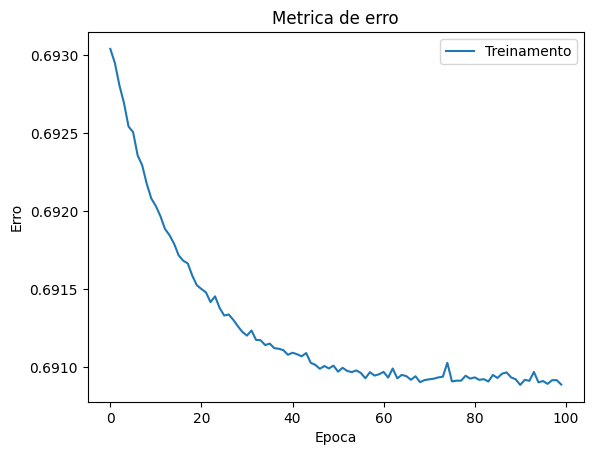

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

--> Acuracia (treino): 0.5337
[1.]
[208]


In [99]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(Y_train, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
pred_np = np.array(pred)
# encontrando os valores unicos de pred_np
unique, counts = np.unique(pred_np, return_counts=True)
dict(zip(unique, counts))
# exibindo esses valores unicos
print(unique)
print(counts)
